## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

### 미니프로젝트 안내
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>
* 1. 구별 버스정류장 분석.ipynb<br>
-- 1.1 bus_station_boarding.csv 파일을 활용하여 <span style="color:blue">서울시 내 각 구별 정류장, 노선수, 승하차 고객수를 분석</span>합니다.<br>
  그런데 bus_station_boarding.csv 파일에는 서울시와 경기도의 버스정류장이 모두 포함되어 있기 때문에<br>
  1.2 bus_station_seoul.csv의 정보를 추가로 활용하여 서울시 정류장만 골라내어 분석 대상에 포함시킵니다.<br><br>
* 2. 구별 이동인구 분석.ipynb<br>
-- 2. seoul_moving.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 이동 시간과 이동 인구를 분석</span>합니다.<br><br>
* 3. 구별 등록인구 분석.ipynb<br>
-- 3. seoul_people.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록인구를 분석</span>합니다. <br><br>
* 4. 구별 업종 분석.ipynb<br>
-- 4. business_type.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록업종을 분석</span>합니다.<br><br>
* 5. 데이터 분석.ipynb<br>
-- 위 1~4에서 도출한 데이터 프레임을 합쳐서 <span style="color:blue">서울시 내 어느 구에 버스 노선을 추가해야 할 지</span> 가설 수립 및 검증 과정을 거쳐 분석합니다.<br> (y값은 정류장 수 또는 노선 수)

# 1. 버스정류장 분석
### 버스정류장 데이터를 활용하여 서울시 내 각 구별 정류장 수, 노선 수, 승하차 고객수를 분석

### 이때, 서울시가 아닌 정류장 정보가 포함되어 있다면 이 정류장들을 제거하고 분석해야 합니다.

## 데이터 안내

[기본 데이터]
* 1.1 bus_station_boarding.csv
* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_seoul.csv
* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

#### [1.1.1] 데이터 로딩


In [ ]:
import sys
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bus_station = pd.read_csv('/content/drive/MyDrive/미니프로젝트/1차_서울시 생활정보 기반 대중교통 수요 분석/데이터/1.1 bus_station_boarding.csv', sep=',', encoding='cp949')

#### [1.2.1] 기본 정보 확인하기


In [ ]:
bus_station .shape

(1169878, 8)

In [ ]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [ ]:
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [ ]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


#### [1.2.2] 버스정류장 위치를 구 별로 구분 하기

* 버스정류장ARS번호의 앞 두자리가 구를 의미

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록

In [ ]:
bus_station['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [ ]:
# 버스정류장 ARS 번호의 앞자리 2개를 잘라내어 새로 '자치구' 컬럼을 생성합니다
bus_station['자치구'] = bus_station['버스정류장ARS번호'].str[:2]
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,06
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,06
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,06
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,06
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11


In [ ]:
bus_station['자치구'].unique()

array(['06', '11', '09', '01', '14', '13', '04', '22', '38', '20', '21',
       '19', '18', '03', '02', '08', '17', '05', '10', '35', '12', '07',
       '68', '16', '~', '42', '49', '39', '15', '23', '44', '25', '24',
       '48', '36', '40', '57', '56', '28', '61', '63', '46', '45', '31',
       '30', '37', '60', '27', '47', '59'], dtype=object)

#### [1.2.3] 서울시 자치구에 해당하는 버스정류장만 추출하기
서울시 구별 코드정보<br>
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'

In [ ]:
# 숫자 2자리 구 코드를 구 이름으로 변환
code={'01': '종로구', '02': '중구', '03': '용산구', '04': '성동구', '05': '광진구', '06': '동대문구', '07': '중랑구', '08': '성북구', '09': '강북구', '10': '도봉구', '11': '노원구', '12': '은평구', '13': '서대문구', '14': '마포구', '15': '양천구', '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구', '21': '관악구', '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'}
bus_station['자치구'] = bus_station['자치구'].map(code)
bus_station['자치구'].unique()

array(['동대문구', '노원구', '강북구', '종로구', '마포구', '서대문구', '성동구', '서초구', nan,
       '동작구', '관악구', '영등포구', '금천구', '용산구', '중구', '성북구', '구로구', '광진구',
       '도봉구', '은평구', '중랑구', '강서구', '양천구', '강남구', '강동구', '송파구'],
      dtype=object)

In [ ]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


#### [1.2.4] 결측치 처리

In [ ]:
bus_station.isnull().sum()

사용일자               0
노선번호               0
노선명                0
버스정류장ARS번호         0
역명                 0
승차총승객수             0
하차총승객수             0
등록일자               0
자치구           105284
dtype: int64

In [ ]:
#결측치 처리(서울시가 아닌 정류장)
bus_station = bus_station.dropna(axis = 0)

In [ ]:
bus_station.isnull().sum()

사용일자          0
노선번호          0
노선명           0
버스정류장ARS번호    0
역명            0
승차총승객수        0
하차총승객수        0
등록일자          0
자치구           0
dtype: int64

In [ ]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064594 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1064594 non-null  int64 
 1   노선번호        1064594 non-null  object
 2   노선명         1064594 non-null  object
 3   버스정류장ARS번호  1064594 non-null  object
 4   역명          1064594 non-null  object
 5   승차총승객수      1064594 non-null  int64 
 6   하차총승객수      1064594 non-null  int64 
 7   등록일자        1064594 non-null  int64 
 8   자치구         1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 81.2+ MB


#### [1.2.5] 데이터 추가 분석 (버스정류장의 위치가 서울시인지 재확인)

* 위에서 버스정류장ARS번호의 앞 2자리로 서울시 자치구에 속한 버스정류장만 추출했습니다.
* 그런데 이렇게 추출한 버스정류장도 서울시에 속하지 않는 경우가 있어, 추가 데이터를 활용하여 한번 더 서울시 정류장만 추출하려고 합니다.

In [ ]:
bus_station.groupby('자치구')['버스정류장ARS번호'].nunique()

자치구
강남구     506
강동구     373
강북구     413
강서구     566
관악구     468
광진구     272
구로구     486
금천구     345
노원구     515
도봉구     361
동대문구    306
동작구     442
마포구     568
서대문구    460
서초구     600
성동구     436
성북구     606
송파구     416
양천구     323
영등포구    467
용산구     323
은평구     501
종로구     350
중구      178
중랑구     423
Name: 버스정류장ARS번호, dtype: int64

In [ ]:
# 강남구와 서초구에 500개가 넘는 버스정류장이 있습니다.
# 이 중에 랜덤으로 몇 개를 골라 해당 자치구의 정류장이 맞는 지 확인해 보고자 합니다.
# 강남구의 버스정류장ARS번호 전체값을 출력해, 강남구의 버스정류장ARS번호 하나를 조사(네이버 지도에서 버스정류장 검색)해봅니다.
bus_station.loc[bus_station['자치구']=='강남구',['자치구','버스정류장ARS번호']]

,자치구,버스정류장ARS번호
897,강남구,23783
904,강남구,23081
905,강남구,23074
923,강남구,23062
1020,강남구,23045
...,...,...
1169835,강남구,23223
1169842,강남구,23216
1169850,강남구,23189
1169861,강남구,23290


* 예를 들어 강남구 정류장 중 하나인 23081 정류장을 네이버지도에서 버스정류장 검색을 해보면 강남구가 아니라 남양주에 위치
* (도메인 지식) 2015년경 버스 노선을 정리 하면서 서울에서 경기도까지 이어지는 노선들의 버스정류장 ARS번호에 서울시 코드를 부여하여 생긴 현상

#### [1.2.6] 추가 csv 파일로 서울시 버스정류장만 추출하기
* 위에서 작업한 bus_station 데이터와 서울의 버스 정류장 데이터를 merge
* 서울의 버스 정류장만 포함하고 있는 csv 파일

파일명: 1.2 bus_station_seoul.csv

출처: https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (서울 열린데이터 광장)

In [ ]:
only_seoul=pd.read_csv('/content/drive/MyDrive/미니프로젝트/1차_서울시 생활정보 기반 대중교통 수요 분석/데이터/1.2 bus_station_seoul.csv')

In [ ]:
only_seoul.head()

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [ ]:
only_seoul

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
10930,25995,우성아파트
10931,25996,우성아파트
10932,25997,조일약국
10933,25998,성내시장


In [ ]:
#강남구 정류장ARS번호 23081이 이 데이터프레임에 있는지 찾기
only_seoul[(only_seoul['ARS-ID'] == '23081')]

,ARS-ID,정류소명


In [ ]:
# bus_station과 only_seoul 데이터를 merge 전에 버스정류장ARS번호의 type을 변경
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)
only_seoul.info()
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064594 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1064594 non-null  int64 
 1   노선번호        1064594 non-null  object
 2   노선명         1064594 non-null  object
 3   버스정류장ARS번호  1064594 non-null  int64 
 4   역명          1064594 non-null  object
 5   승차총승객수      1064594 non-null  int64 
 6   하차총승객수      1064594 non-null  int64 
 7   등록일자        1064594 non-null  int64 
 8   자치구         1064594 non-null  object
dtypes: int64(5), object(4)
memory usage: 81.2+ MB


In [ ]:
# 두 데이터를 합치기 전에 데이터의 컬럼명을 변경합니다. (버스정류장ARS번호)
only_seoul.rename(columns={'ARS-ID' : '버스정류장ARS번호'},inplace=True)
only_seoul

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
10930,25995,우성아파트
10931,25996,우성아파트
10932,25997,조일약국
10933,25998,성내시장


In [ ]:
seoul_bus_station=pd.merge(bus_station, only_seoul, how = 'inner')
seoul_bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,정류소명
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구,장안동삼성쉐르빌아파트
1,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,75,197,20220404,동대문구,장안동삼성쉐르빌아파트
2,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,21,245,20220404,동대문구,장안동삼성쉐르빌아파트
3,20220401,2416,2416번(중랑공영차고지~삼성역),6243,장안동삼성쉐르빌아파트,42,268,20220404,동대문구,장안동삼성쉐르빌아파트
4,20220402,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,12,127,20220405,동대문구,장안동삼성쉐르빌아파트
...,...,...,...,...,...,...,...,...,...,...
1060881,20220429,7019,7019번(은평공영차고지~시청(서소문)),12242,응암2동주민센터,3,161,20220502,은평구,응암2동주민센터
1060882,20220429,7734,7734번(진관공영차고지~홍대입구역),12242,응암2동주민센터,29,139,20220502,은평구,응암2동주민센터
1060883,20220430,7734,7734번(진관공영차고지~홍대입구역),12242,응암2동주민센터,15,82,20220503,은평구,응암2동주민센터
1060884,20220430,7019,7019번(은평공영차고지~시청(서소문)),12242,응암2동주민센터,2,99,20220503,은평구,응암2동주민센터


In [ ]:
# 버스정류장ARS번호 갯수를 확인해봅니다.
seoul_bus_station['버스정류장ARS번호'].count()

1060886

#### [1.2.7] 구 별로 버스 정류장의 개수 확인

In [ ]:
# 구 별로 버스 정류장의 개수를 확인
# 구 별 버스정류장 개수로 구성된 데이터프레임을 seoul_bus_station_ARS에 저장
# 컬럼 이름 변경 (버스정류장ARS번호: 버스 정류장 수)
seoul_bus_station_ARS=seoul_bus_station.groupby('자치구',as_index=False)['버스정류장ARS번호'].nunique()
seoul_bus_station_ARS.rename(columns={'버스정류장ARS번호': '버스 정류장 수'}, inplace=True)

In [ ]:
seoul_bus_station_ARS

,자치구,버스 정류장 수
0,강남구,499
1,강동구,369
2,강북구,413
3,강서구,566
4,관악구,466
5,광진구,269
6,구로구,486
7,금천구,345
8,노원구,514
9,도봉구,359


#### [1.2.8] 구 별로 버스 노선이 몇 개 지나가는 지 확인
* 구 별로 버스 노선의 개수 확인

In [ ]:
# 구 별로 버스 노선 개수를 확인
# 구 별 버스 노선 개수로 구성된 데이터프레임을 seoul_bus_station_line에 저장
seoul_bus_station_line=bus_station.groupby('자치구',as_index=False)['노선번호'].nunique()
seoul_bus_station_line.rename(columns={'노선번호': '버스 노선 수'}, inplace=True)
seoul_bus_station_line

,자치구,버스 노선 수
0,강남구,92
1,강동구,21
2,강북구,67
3,강서구,49
4,관악구,88
5,광진구,41
6,구로구,79
7,금천구,58
8,노원구,57
9,도봉구,47


#### [1.2.9] 구 별로 승차 총 승객수, 하차 총 승객수 확인

In [ ]:
# 구 별 승차총승객수, 하차총승객수를 확인
# 구 별 승차총승객수, 하차총승객수로 구성된 데이터프레임을 seoul_bus_station_sum에 저장

seoul_bus_station_sum=seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수','하차총승객수'].sum()
seoul_bus_station_sum

<ipython-input-30-4d48a78fa6bf>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_sum=seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수','하차총승객수'].sum()


,자치구,승차총승객수,하차총승객수
0,강남구,8030483,7569213
1,강동구,2890053,2830506
2,강북구,4825181,4671783
3,강서구,4681083,4652828
4,관악구,7655819,7792476
5,광진구,2749448,2753411
6,구로구,4942197,4730992
7,금천구,3776658,3581930
8,노원구,4353295,4292724
9,도봉구,3304305,3211421


#### [1.2.10] 구 별로 승차 평균 승객수, 하차 평균 승객수 확인

In [ ]:
# 구 별 승차 승객수, 하차 승객수의 평균을 확인
# 구 별 승차 승객수, 하차 승객수의 평균으로 구성된 데이터프레임을 seoul_bus_station_mean에 저장
# 컬럼명은 승차평균승객수, 하차평균승객수
seoul_bus_station_mean=seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수','하차총승객수'].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수': '승차평균승객수','하차총승객수': '하차평균승객수'},inplace=True)
seoul_bus_station_mean

<ipython-input-31-607a532dcea6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seoul_bus_station_mean=seoul_bus_station.groupby('자치구', as_index=False)['승차총승객수','하차총승객수'].mean()


,자치구,승차평균승객수,하차평균승객수
0,강남구,128.767927,121.371512
1,강동구,99.161194,97.118065
2,강북구,133.020373,128.791504
3,강서구,88.119480,87.587591
4,관악구,154.753674,157.516040
5,광진구,118.352546,118.523137
6,구로구,119.235615,114.140076
7,금천구,123.098370,116.751304
8,노원구,88.476211,87.245168
9,도봉구,106.859356,103.855540


#### [1.2.11] 데이터 프레임 합치기

In [ ]:
# 4개의 데이터 프레임을 합쳐서 seoul_bus_station에 저장

# 첫 번째 데이터프레임을 기준으로 병합
seoul_bus_station = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line, on='자치구')
# 두 번째 데이터프레임을 기준으로 병합
seoul_bus_station = pd.merge(seoul_bus_station, seoul_bus_station_sum, on='자치구')
# 세 번째 데이터프레임을 기준으로 병합
seoul_bus_station = pd.merge(seoul_bus_station, seoul_bus_station_mean, on='자치구')
seoul_bus_station.head()

,자치구,버스 정류장 수,버스 노선 수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,92,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,88,7655819,7792476,154.753674,157.516040


In [ ]:
seoul_bus_station.to_csv('/content/drive/MyDrive/미니프로젝트/1차_서울시 생활정보 기반 대중교통 수요 분석/데이터/df_seoul_bus_station.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

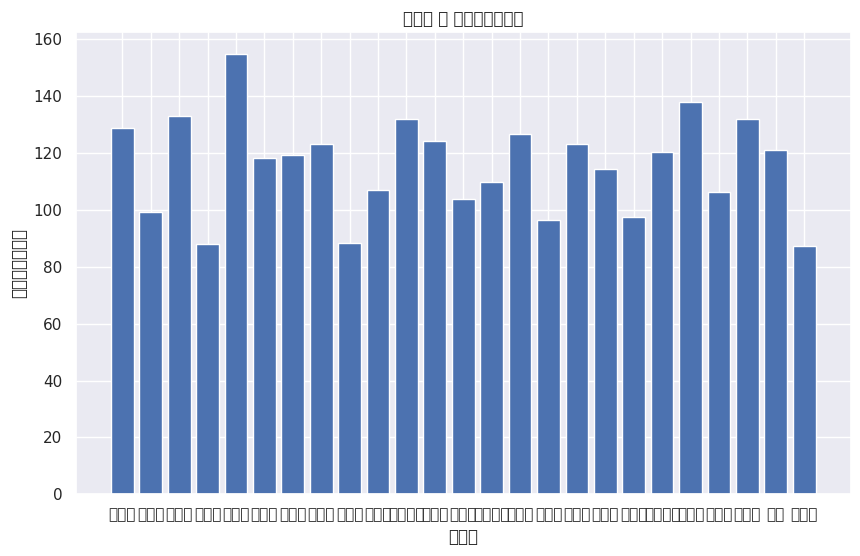

In [ ]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10, 6))
plt.bar(seoul_bus_station['자치구'], seoul_bus_station['승차평균승객수'])
plt.xlabel('자치구')
plt.ylabel('승차평균승객수')
plt.title('자치구 별 승차평균승객수')
plt.show()